In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

We will minisom library

In [54]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

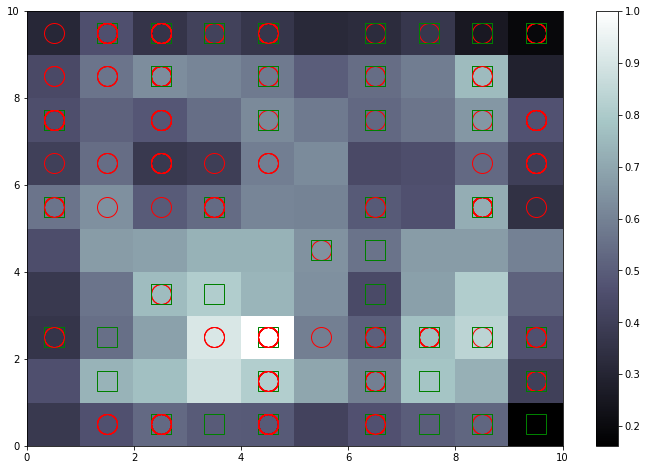

In [117]:
from pylab import bone, pcolor, colorbar, plot, show
plt.figure(figsize=(12,8))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor=colors[y[i]], markerfacecolor='None', markersize=20)

Frauds, As we can see 4,2 and 3,2 looks like frauds

In [88]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,2)], mappings[(3,2)]), axis = 0)

In [89]:
frauds = sc.inverse_transform(frauds)

This is the list of suspected frauds

In [90]:
frauds[:,0]

array([ 15610042.,  15568162.,  15662152.,  15734578.,  15570508.,
        15641733.,  15660144.,  15603565.,  15664720.,  15645820.,
        15800554.,  15696120.,  15567919.,  15687634.,  15638751.,
        15665014.,  15606554.,  15694666.,  15646594.,  15711299.])

In [91]:
customers = data.iloc[:,1:].values

In [94]:
is_fraud = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [95]:
is_fraud

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [97]:
from keras.models import Sequential
from keras.layers import Dense

In [102]:
classifier = Sequential()
classifier.add(Dense(units=2, activation='relu', kernel_initializer='uniform', input_dim=15))
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
classifier.fit(x=customers, y=is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 2ms/step - loss: 0.0631 - acc: 0.9710
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.0579 - acc: 0.9710


In [105]:
fraud_prob = classifier.predict(customers)

In [110]:
fraud_prob = np.concatenate((data.iloc[:,0:1].values, fraud_prob), axis=1)

In [114]:
fraud_prob = fraud_prob[[fraud_prob[:,1].argsort()]]

In [115]:
fraud_prob

array([[  1.56225070e+07,   4.24099271e-05],
       [  1.57043150e+07,   5.90223426e-05],
       [  1.57892010e+07,   6.52096205e-05],
       ..., 
       [  1.56647200e+07,   3.21043938e-01],
       [  1.56458200e+07,   3.21043938e-01],
       [  1.56035650e+07,   3.21043938e-01]])